In [1]:
!wget https://www.dropbox.com/s/vgd22go8a6k721t/road_image.png

--2023-10-23 11:53:43--  https://www.dropbox.com/s/vgd22go8a6k721t/road_image.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/vgd22go8a6k721t/road_image.png [following]
--2023-10-23 11:53:43--  https://www.dropbox.com/s/raw/vgd22go8a6k721t/road_image.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7acc65093a89e7ea3c6a9c3a1d.dl.dropboxusercontent.com/cd/0/inline/CGJ6LwS7ZBPVel9G4l0pf5Sz_dWPe-N1lS_IHY6G8hy137I71aKwBvaUBm4kJRmTvl6nP9rh8Bq-SlQO2y4rb0vxqfckgbXhQXBWPgTncCKBRL1_sIdu97r8gI6PrREQq8zZOq0S7EbgmyHr_owbiuh6/file# [following]
--2023-10-23 11:53:43--  https://uc7acc65093a89e7ea3c6a9c3a1d.dl.dropboxusercontent.com/cd/0/inline/CGJ6LwS7ZBPVel9G4l0pf5Sz_dWPe-N1lS_IHY6G8hy137I71aKwBvaUBm4kJRmTvl6nP9rh8Bq-SlQO2y4rb0vxqfckgbXh

In [2]:
!pip install -q torch_snippets
from torch_snippets import show, read, subplots, cv2, np
IMG = read('road_image.png', 1)
img = np.uint8(IMG.copy())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 101.4 MB/s eta 0

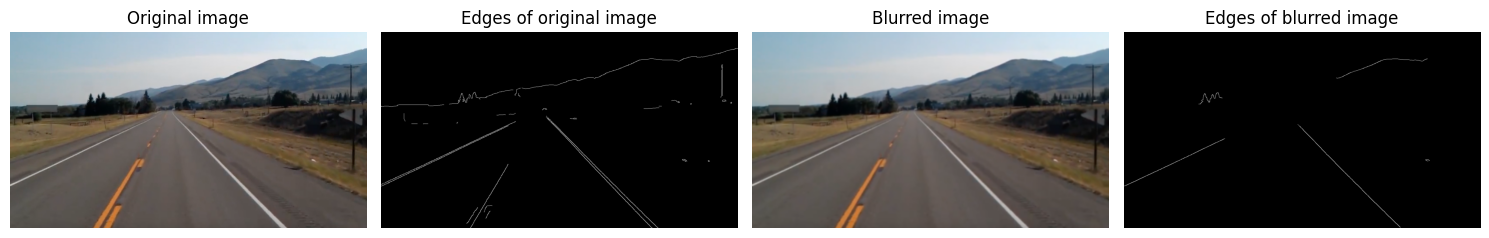

In [3]:
blur_img = cv2.blur(img, (5, 5))
edges = cv2.Canny(blur_img, 150, 255)
edges_org = cv2.Canny(img, 150, 255)
subplots([img, edges_org, blur_img, edges], nc=4,
         titles=['Original image', 'Edges of original image',
                 'Blurred image', 'Edges of blurred image'], sz=15)

In [4]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 100)

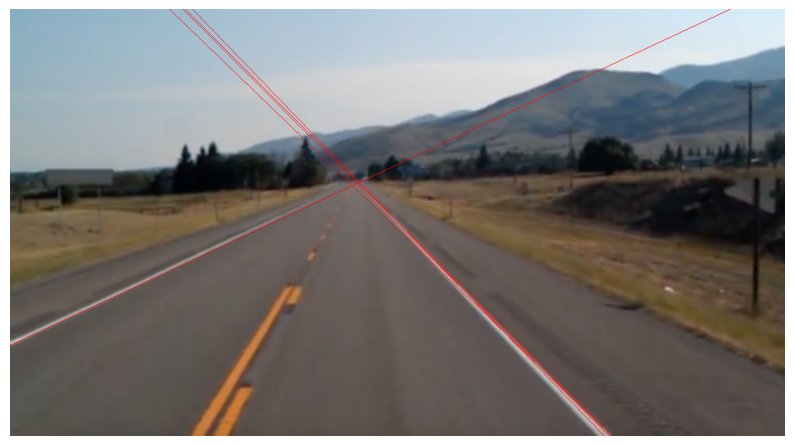

In [5]:
lines = lines[:, 0, :]
for rho, theta in lines:
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a * rho
  y0 = b * rho
  x1 = int(x0 + 10000 * (-b))
  y1 = int(y0 + 10000*(a))
  x2 = int(x0 - 10000*(-b))
  y2 = int(y0 - 10000*(a))
  if theta < 75 * 3.141/180 or theta > 105 * 3.141 / 180:
    cv2.line(blur_img, (x1, y1), (x2, y2), (255, 0, 0), 1)

show(blur_img, sz=10)

---